# EPL GOAL SCORING PREDICTOR 2019/2020

## The goal is to analyze dataset of the 2017/18 season, 2018/19 season and 2019/20 season

## DATA COLLECTION

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='PREMIER LEAGUE 2018_19 GOAL PREDICTOR - PREMIER LEAGUE 2018_19 GOAL PREDICTOR.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,Player Name,Team Name,Goal Scored in previous season,Assists in Previous Season,Minutes played in previous season,Team Value,Goal Scored in 2018/19
0,Aubameyang,ARS,10,4,1056,4,22
1,Bellerin,ARS,2,4,3050,4,0
2,Cech,ARS,0,0,3039,4,0
3,Chambers,ARS,0,0,864,4,0
4,Elneny,ARS,0,1,865,4,0


In [2]:
## The dataset was assigned a new name
df_epl201819 = df_data_1

In [3]:
df_epl201819.columns

Index(['Player Name', 'Team Name', 'Goal Scored in previous season',
       'Assists in Previous Season', 'Minutes played in previous season',
       'Team Value', 'Goal Scored in 2018/19'],
      dtype='object')

## DATA CLEANING

In [4]:
## The column called team name was dropped from the dataset
df_epl201819.drop("Team Name", axis = 1, inplace = True)

In [5]:
## The first five rows of the newly formed dataset
df_epl201819.head()

,Player Name,Goal Scored in previous season,Assists in Previous Season,Minutes played in previous season,Team Value,Goal Scored in 2018/19
0,Aubameyang,10,4,1056,4,22
1,Bellerin,2,4,3050,4,0
2,Cech,0,0,3039,4,0
3,Chambers,0,0,864,4,0
4,Elneny,0,1,865,4,0


In [6]:
## Getting the correlation coefficients of all the columns 
df_epl201819.corr()

,Goal Scored in previous season,Assists in Previous Season,Minutes played in previous season,Team Value,Goal Scored in 2018/19
Goal Scored in previous season,1.000000,0.573433,0.303194,0.179856,0.787315
Assists in Previous Season,0.573433,1.000000,0.402594,0.215244,0.511641
Minutes played in previous season,0.303194,0.402594,1.000000,-0.020704,0.243329
Team Value,0.179856,0.215244,-0.020704,1.000000,0.175282
Goal Scored in 2018/19,0.787315,0.511641,0.243329,0.175282,1.000000


In [7]:
df_epl201819.describe()

,Goal Scored in previous season,Assists in Previous Season,Minutes played in previous season,Team Value,Goal Scored in 2018/19
count,372.000000,372.000000,372.000000,372.000000,372.000000
mean,2.317204,2.126344,1665.188172,3.454301,2.099462
std,4.007597,2.959321,961.882390,1.149503,4.002466
min,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,906.000000,2.000000,0.000000
50%,1.000000,1.000000,1729.000000,3.000000,0.000000
75%,3.000000,3.000000,2347.250000,4.250000,2.000000
max,32.000000,18.000000,3420.000000,5.000000,22.000000


In [8]:
df_epl201819.tail()

,Player Name,Goal Scored in previous season,Assists in Previous Season,Minutes played in previous season,Team Value,Goal Scored in 2018/19
367,Oxford,0,0,4,2,0
368,Reid,0,0,1452,2,0
369,Rice,0,0,1421,2,2
370,Wilshere,1,3,1185,2,0
371,Zabaleta,0,1,3289,2,0


In [9]:
df_epl201819

,Player Name,Goal Scored in previous season,Assists in Previous Season,Minutes played in previous season,Team Value,Goal Scored in 2018/19
0,Aubameyang,10,4,1056,4,22
1,Bellerin,2,4,3050,4,0
2,Cech,0,0,3039,4,0
3,Chambers,0,0,864,4,0
4,Elneny,0,1,865,4,0
5,Holding,0,1,819,4,0
6,Iwobi,3,5,1827,4,3
7,Kolasinac,2,4,2146,4,0
8,Koscielny,2,0,2225,4,3
9,Lacazette,14,5,2197,4,13


## DATA EXPLORATION

In [10]:
## importing plotting packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [11]:
## importing machine learning packages
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [12]:
df_epl201819_2 = df_epl201819.groupby('Team Value').sum()
df_epl201819_3 = df_epl201819_2.reset_index()
df_epl201819_3.head()

,Team Value,Goal Scored in previous season,Assists in Previous Season,Minutes played in previous season,Goal Scored in 2018/19
0,2,168,158,180176,148
1,3,166,147,142118,141
2,4,189,183,141212,182
3,5,339,303,155944,310


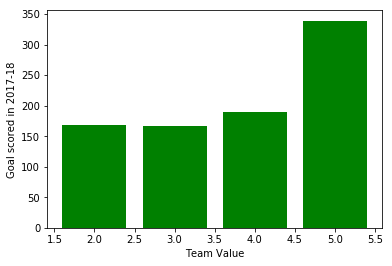

In [13]:
## A bar chart of the goal scored in 2017/18 vs team value
plt.bar('Team Value', 'Goal Scored in previous season', data = df_epl201819_3, color = 'green')
plt.xlabel("Team Value")
plt.ylabel("Goal scored in 2017-18")
plt.show()

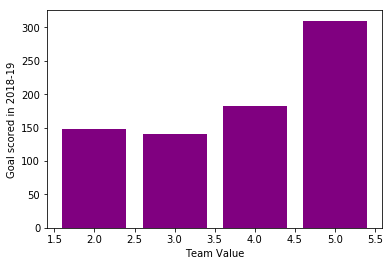

In [14]:
## A bar chart of the goal scored in 2018/19 vs team value
plt.bar('Team Value', 'Goal Scored in 2018/19', data = df_epl201819_3, color = 'purple')
plt.xlabel("Team Value")
plt.ylabel("Goal scored in 2018-19")
plt.show()

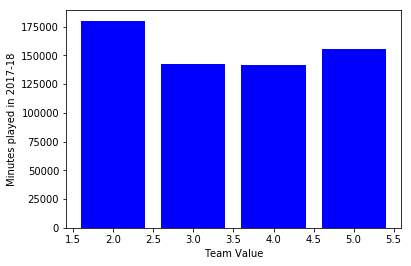

In [15]:
## A bar chart of the minutes played in 2017/18 vs team value
plt.bar('Team Value', 'Minutes played in previous season', data = df_epl201819_3, color = 'blue')
plt.xlabel("Team Value")
plt.ylabel("Minutes played in 2017-18")
plt.show()

In [16]:
df_epl201819_4 = df_epl201819.sort_values(by = ['Goal Scored in previous season'], ascending = False)
df_epl201819_5 = df_epl201819_4.head(20)
df_epl201819_5

,Player Name,Goal Scored in previous season,Assists in Previous Season,Minutes played in previous season,Team Value,Goal Scored in 2018/19
208,Salah,32,12,2905,5,22
311,Kane,29,2,3074,5,17
214,Aguero,21,6,1960,5,21
191,Vardy,20,2,3248,3,18
233,Sterling,18,17,2584,5,17
247,Lukaku,16,7,2866,5,12
195,Firmino,15,8,2760,5,12
9,Lacazette,14,5,2197,4,13
226,Jesus,13,7,1660,5,7
229,Mahrez,12,13,2948,5,7


In [17]:
## Creating a line of fit for the top 20 goal scorers in 2018-19 vs their goals in 2017-18
df_prev = df_epl201819_5.loc[:, "Goal Scored in previous season"].values.reshape(-1, 1) 
df_201819 = df_epl201819_5.loc[:, "Goal Scored in 2018/19"].values.reshape(-1, 1) 
line = linear_model.LinearRegression() 
line.fit(df_prev,df_201819) 
pred = line.predict(df_prev)

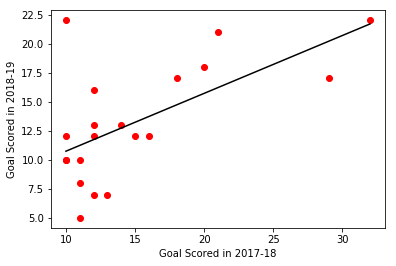

In [18]:
## Creating a scatter plot for the top 20 goal scorers in 2018-19 vs their goals in 2017-18
plt.scatter('Goal Scored in previous season', 'Goal Scored in 2018/19', data = df_epl201819_5, color = 'red')
plt.xlabel('Goal Scored in 2017-18')
plt.ylabel('Goal Scored in 2018-19')
plt.plot(df_prev, pred, color = 'black')
plt.show()

## MODELLING

In [19]:
## Splitting the dataset into training and testing set
import numpy as np
split = np.random.rand(len(df_epl201819)) < 0.75
train = df_epl201819[split]
test = df_epl201819[~split]

In [20]:
## creating a regression model
regr = linear_model.LinearRegression()

In [21]:
## Trainig & fitting the model
df_epl2018_train_x = train[['Team Value','Goal Scored in previous season', 'Assists in Previous Season']]
df_epl2018_train_y = train[['Goal Scored in 2018/19']]
poly = PolynomialFeatures(degree=2)
df_epl2018_train_poly_x = poly.fit_transform(df_epl2018_train_x)
regr.fit(df_epl2018_train_poly_x, df_epl2018_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
## Testing the model
df_epl2018_test_x = test[['Team Value','Goal Scored in previous season','Assists in Previous Season']]
df_epl2018_test_y  = test[['Goal Scored in 2018/19']]
df_epl2018_test_poly_x = poly.fit_transform(df_epl2018_test_x)

In [23]:
df_epl2018_pred = regr.predict(df_epl2018_test_poly_x )

In [24]:
r2_score(df_epl2018_test_y, df_epl2018_pred)

0.5222634123270176

In [25]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df_epl2018_test_y, df_epl2018_pred)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)  

Pearson Correlation Coefficient:  [0.82863211] and a P-value of: [2.20415038e-23]


In [26]:
regr2 = linear_model.LinearRegression()

In [27]:
regr2.fit(df_epl2018_train_x, df_epl2018_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
df_epl2018_pred2 = regr2.predict(df_epl2018_test_x )

In [29]:
r2_score(df_epl2018_test_y, df_epl2018_pred2)

0.73093084418271

In [30]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df_epl2018_test_y, df_epl2018_pred2)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)  

Pearson Correlation Coefficient:  [0.85846665] and a P-value of: [1.14431052e-26]


## VALIDATION DATA SET

In [31]:
## Importing the validating dataset
body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='PREMIER LEAGUE 2019_2020 goal predictor - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()



,Player Name,Minutes played in previous season,Goal Scored in previous season,Assists in Previous Season,Team Value
0,"Aubameyang, Pierre-Emerick ARS",2116,22,4,4
1,"Mane, Sadio LIV",2384,22,1,5
2,"Salah, Mohamed LIV",2497,22,7,5
3,"Aguero, Sergio MCI",1833,21,8,5
4,"Vardy, Jamie LEI",2215,18,4,3


In [32]:
df_epl201920 = df_data_2

## VALIDATION DATA SET CLEANING

In [33]:
df_epl201920_1 = df_epl201920.drop(df_epl201920.index[[7,220]], axis = 0).reset_index()
df_epl201920_1.drop("index",axis = 1, inplace = True)
df_epl201920_1.head(10)

,Player Name,Minutes played in previous season,Goal Scored in previous season,Assists in Previous Season,Team Value
0,"Aubameyang, Pierre-Emerick ARS",2116,22,4,4
1,"Mane, Sadio LIV",2384,22,1,5
2,"Salah, Mohamed LIV",2497,22,7,5
3,"Aguero, Sergio MCI",1833,21,8,5
4,"Vardy, Jamie LEI",2215,18,4,3
5,"Sterling, Raheem MCI",2187,17,9,5
6,"Kane, Harry TOT",1623,17,4,5
7,"Wilson, Callum BOU",1747,14,9,2
8,"Murray, Glenn BHA",1850,13,1,2
9,"Lacazette, Alexandre ARS",1880,13,8,4


In [34]:
df_epl201920_1.iloc[137,1] = 460

In [35]:
df_epl201920_1.iloc[137,]

Player Name                          Yarmolenko, Andriy WHU
Minutes played in previous season                       460
Goal Scored in previous season                            2
Assists in Previous Season                                0
Team Value                                                3
Name: 137, dtype: object

## APPLYING THE TRAINING DATA SET MODELLING ON THE VALIDATION DATASET

In [36]:
df_epl201920_val_x = df_epl201920_1[['Team Value','Goal Scored in previous season', 'Assists in Previous Season']]
df_epl201920_val_poly_x = poly.fit_transform(df_epl201920_val_x)

In [37]:
df_epl201920_pred = regr2.predict(df_epl201920_val_x)
df_epl201920_pred2 = regr.predict(df_epl201920_val_poly_x)

In [38]:
df_epl201920_1['Predicted goals for 2019-20'] = df_epl201920_pred

In [39]:
df_epl201920_1.head(20)

,Player Name,Minutes played in previous season,Goal Scored in previous season,Assists in Previous Season,Team Value,Predicted goals for 2019-20
0,"Aubameyang, Pierre-Emerick ARS",2116,22,4,4,17.429561
1,"Mane, Sadio LIV",2384,22,1,5,17.311769
2,"Salah, Mohamed LIV",2497,22,7,5,17.759541
3,"Aguero, Sergio MCI",1833,21,8,5,17.067523
4,"Vardy, Jamie LEI",2215,18,4,3,14.256879
5,"Sterling, Raheem MCI",2187,17,9,5,14.075565
6,"Kane, Harry TOT",1623,17,4,5,13.702422
7,"Wilson, Callum BOU",1747,14,9,2,11.457341
8,"Murray, Glenn BHA",1850,13,1,2,10.093665
9,"Lacazette, Alexandre ARS",1880,13,8,4,10.828255


In [40]:
df_epl201920_4 = df_epl201920_1.sort_values(by = ['Predicted goals for 2019-20'], ascending = False).reset_index()
df_epl201920_5 = df_epl201920_4.head(20)
df_epl201920_5.drop("index", axis = 1, inplace = True)
df_epl201920_5.head(20)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Player Name,Minutes played in previous season,Goal Scored in previous season,Assists in Previous Season,Team Value,Predicted goals for 2019-20
0,"Salah, Mohamed LIV",2497,22,7,5,17.759541
1,"Aubameyang, Pierre-Emerick ARS",2116,22,4,4,17.429561
2,"Mane, Sadio LIV",2384,22,1,5,17.311769
3,"Aguero, Sergio MCI",1833,21,8,5,17.067523
4,"Vardy, Jamie LEI",2215,18,4,3,14.256879
5,"Sterling, Raheem MCI",2187,17,9,5,14.075565
6,"Kane, Harry TOT",1623,17,4,5,13.702422
7,"Wilson, Callum BOU",1747,14,9,2,11.457341
8,"Pogba, Paul MUN",2226,13,9,4,10.902884
9,"Lacazette, Alexandre ARS",1880,13,8,4,10.828255
